<a href="https://colab.research.google.com/github/SowndaryaBhaskaran/CodeAlpha_Project_IrisFlowerClassification/blob/main/Iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the dataset from Kaggle
!pip install -q kaggle

# Upload your Kaggle API token
from google.colab import files
files.upload()

# Move the kaggle.json to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Iris dataset
!kaggle datasets download -d saurabh00007/iriscsv
!unzip iriscsv


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/saurabh00007/iriscsv
License(s): CC0-1.0
iriscsv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  iriscsv.zip
replace Iris.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [5]:
# Load the dataset into a DataFrame
data = pd.read_csv('Iris.csv')

# Check the columns in the DataFrame
print(data.columns)

# Encode species labels (adjusted to match the actual column name)
data['Species'] = data['Species'].astype('category').cat.codes

# Features and target variable
X = data.drop('Species', axis=1)  # Drop 'Species' instead of 'species'
y = data['Species']  # Use 'Species' instead of 'species'


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# List of models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=600),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}


In [8]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Setosa', 'Versicolor', 'Virginica'])

    return accuracy, cm, report


--- Decision Tree ---
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



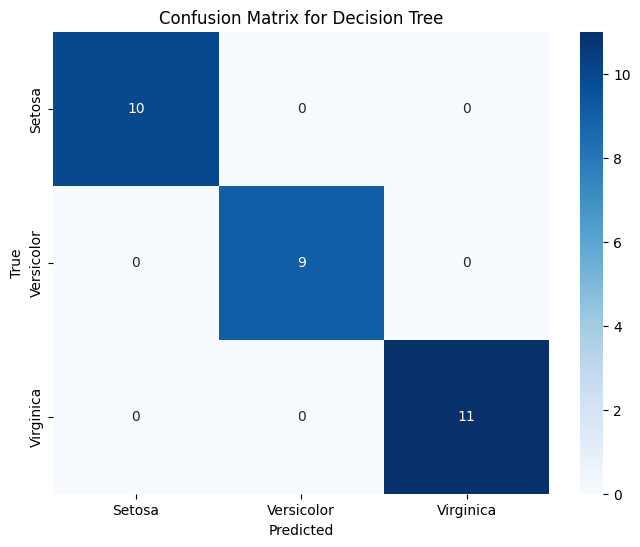

--- Logistic Regression ---
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



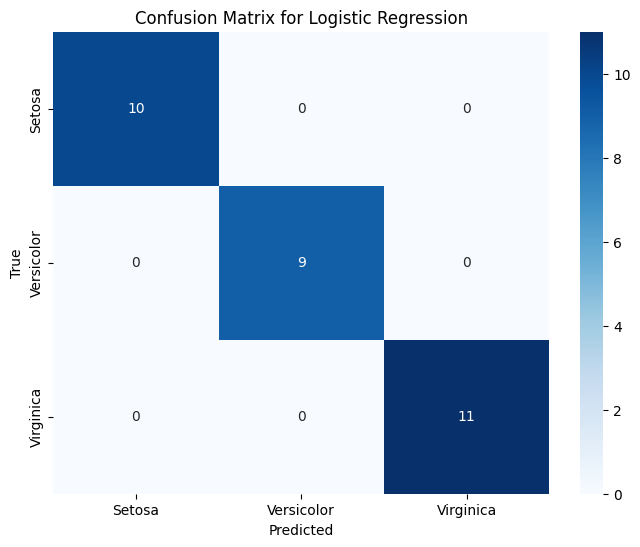

--- Random Forest ---
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



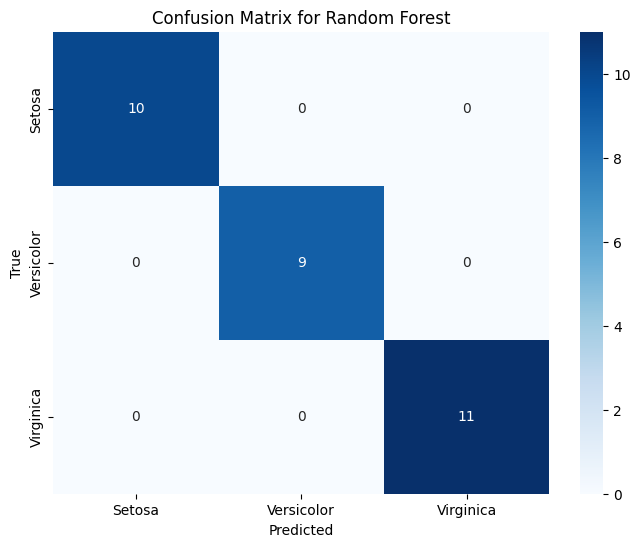

--- Support Vector Machine ---
Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



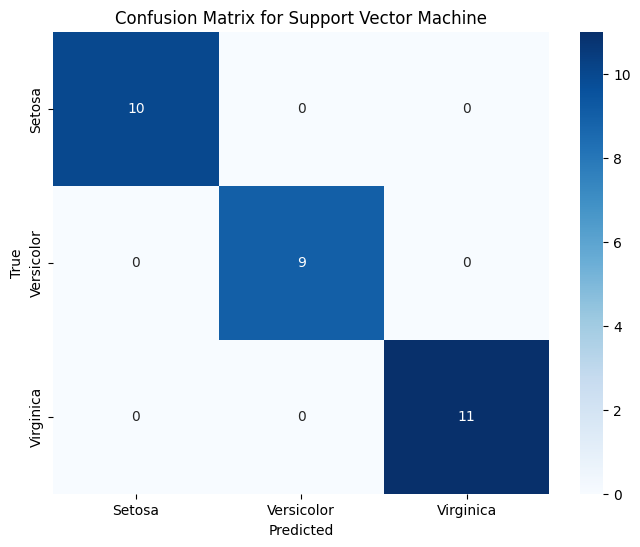

In [9]:
# Evaluate each model
results = {}
for model_name, model in models.items():
    accuracy, cm, report = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': report
    }
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [10]:
# Summary of results
print("\nSummary of Results:")
for model_name, result in results.items():
    print(f"{model_name}: {result['Accuracy']:.2f}")



Summary of Results:
Decision Tree: 1.00
Logistic Regression: 1.00
Random Forest: 1.00
Support Vector Machine: 1.00
